# Loan Application Status Prediction
### Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.	Married - This refers to applicant being in a state of matrimony

4.	Dependents - This refres to persons who depends on the applicants for survival

5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

### Dataset Link-  
# •	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Loan%20Application%20Status/loan_prediction.csv



In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv')
df

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df = df.rename({"LP001002":"Loan_ID", "Male":"Gender", "No":"Married", "0":"Dependents", "Graduate":"Education", "No.1":"Self_Employed",
               "5849":"ApplicantIncome", "0.1":"CoapplicantIncome", "Unnamed: 8": "LoanAmount", "360": "Loan_Amount_Term",
               "1" :"Credit_History", "Urban":"Property_Area", "Y":"Loan_Status"}, axis='columns')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(613, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            613 non-null    object 
 1   Gender             600 non-null    object 
 2   Married            610 non-null    object 
 3   Dependents         598 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      581 non-null    object 
 6   ApplicantIncome    613 non-null    int64  
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   599 non-null    float64
 10  Credit_History     563 non-null    float64
 11  Property_Area      613 non-null    object 
 12  Loan_Status        613 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Education'].fillna(df['Education'].mode()[0],inplace=True)

In [9]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [10]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,613.000000,613.000000,613.000000,613.000000,613.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,6114.004114,2927.903583,84.106098,64.420943,0.349908
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,129.000000,360.000000,1.000000
75%,5780.000000,2302.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [12]:
df.skew()

ApplicantIncome      6.534654
CoapplicantIncome    7.488653
LoanAmount           2.724391
Loan_Amount_Term    -2.386832
Credit_History      -1.960728
dtype: float64

In [13]:
df['Loan_Status'].value_counts()

Y    421
N    192
Name: Loan_Status, dtype: int64

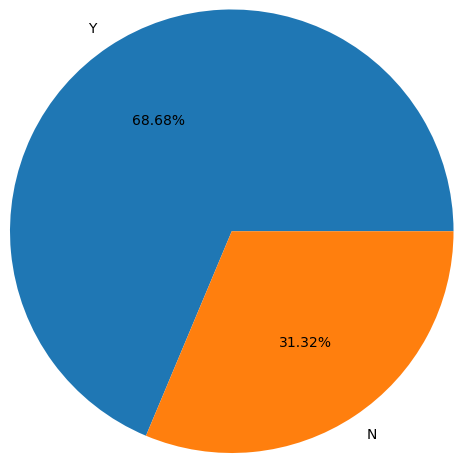

In [14]:
labels = 'Y','N'
fig, ax = plt.subplots()
ax.pie(df['Loan_Status'].value_counts(),labels = labels,radius =1.5,autopct = '%1.2f%%')
plt.show()

In [15]:
df['Gender'].value_counts()

Male      501
Female    112
Name: Gender, dtype: int64

In [16]:
df['Married'].value_counts()

Yes    401
No     212
Name: Married, dtype: int64

In [17]:
df['Dependents'].value_counts()

0     359
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [18]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        201
Rural        179
Name: Property_Area, dtype: int64

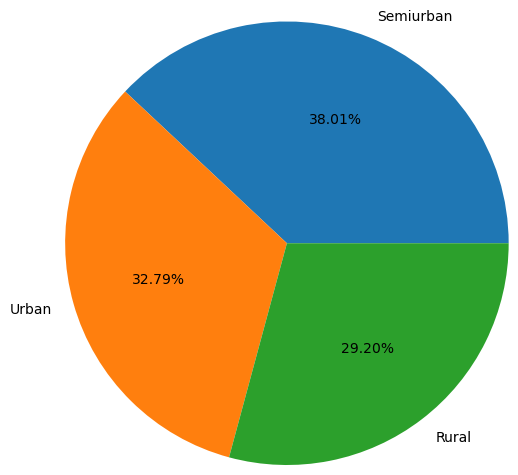

In [19]:
labels = 'Semiurban','Urban','Rural'
fig, ax = plt.subplots()
ax.pie(df['Property_Area'].value_counts(),labels = labels,radius =1.5,autopct = '%1.2f%%')
plt.show()

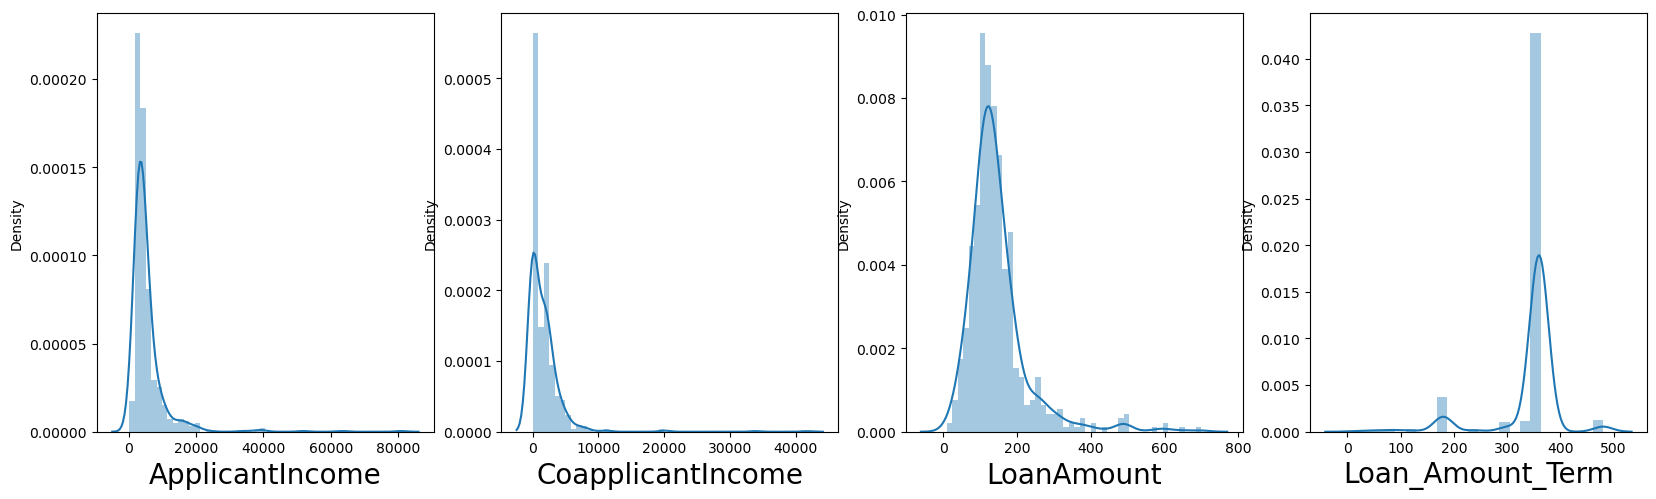

In [20]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for col in df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]:
    if plotnumber<=10:
        plt.subplot(4,4,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

In [21]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].skew()

ApplicantIncome      6.534654
CoapplicantIncome    7.488653
LoanAmount           2.724391
Loan_Amount_Term    -2.386832
dtype: float64

In [22]:
df.drop(columns = ['Loan_ID'],inplace=True)

In [23]:
df.shape

(613, 12)

In [24]:
x = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

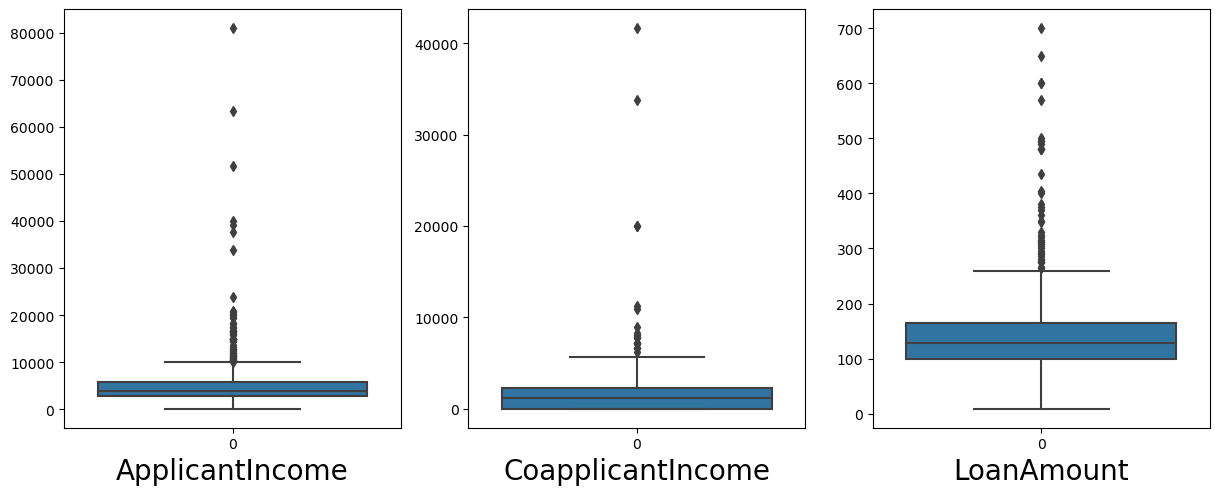

In [25]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for col in x[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnumber<=16:
        plt.subplot(4,4,plotnumber)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

In [26]:
df1 = x[['ApplicantIncome','CoapplicantIncome','LoanAmount']].copy()

In [27]:
df1

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,4583,1508.0,128.0
1,3000,0.0,66.0
2,2583,2358.0,120.0
3,6000,0.0,141.0
4,5417,4196.0,267.0
...,...,...,...
608,2900,0.0,71.0
609,4106,0.0,40.0
610,8072,240.0,253.0
611,7583,0.0,187.0


In [28]:
from scipy.stats import zscore
zscor = zscore(df1)
z_score_abs = np.abs(zscor)

df2 = df1[(z_score_abs < 3).all(axis=1)]

In [29]:
df2.shape

(588, 3)

In [30]:
df1.shape

(613, 3)

In [31]:
loss=(614-589)/614 * 100
loss

4.071661237785016

In [32]:
dropindex = x.index.difference(df2.index)

In [33]:
dropindex

Int64Index([  8, 125, 129, 154, 170, 176, 182, 184, 277, 307, 332, 368, 401,
            408, 416, 431, 442, 486, 505, 522, 524, 560, 580, 599, 603],
           dtype='int64')

In [34]:
df.drop(dropindex,inplace = True)

In [35]:
df.reset_index(drop=True,inplace = True)

In [36]:
df.shape

(588, 12)

In [37]:
x = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

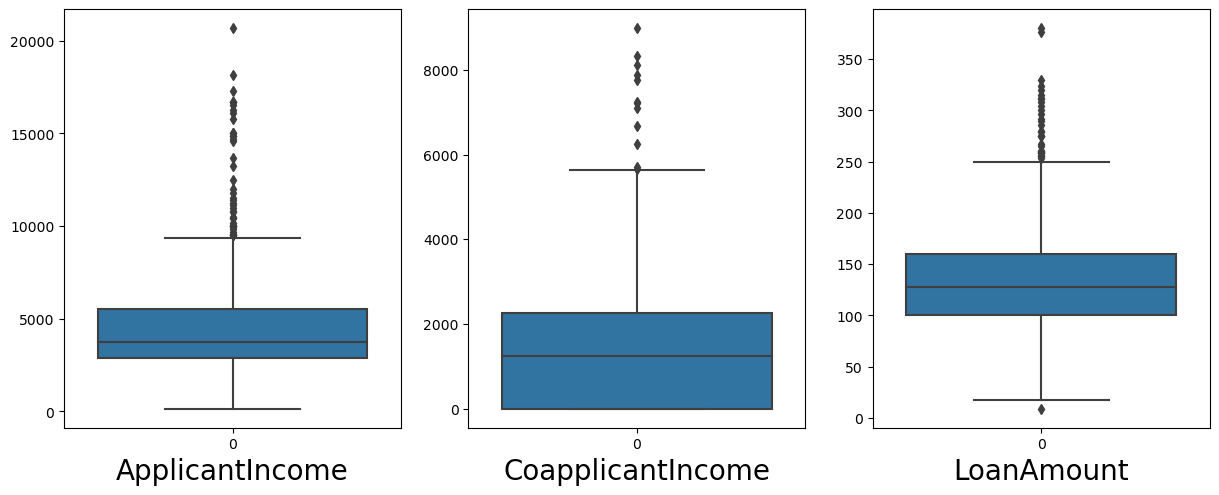

In [38]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for col in x[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnumber<=16:
        plt.subplot(4,4,plotnumber)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

In [39]:
x.skew()

ApplicantIncome      2.165819
CoapplicantIncome    1.351274
LoanAmount           1.076410
Loan_Amount_Term    -2.430134
Credit_History      -1.950321
dtype: float64

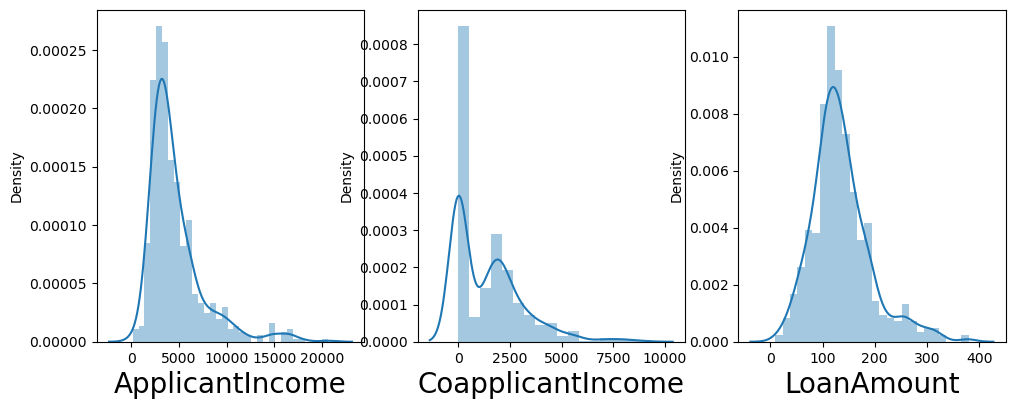

In [40]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for col in x[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnumber<=35:
        plt.subplot(5,5,plotnumber)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

In [41]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
583,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
584,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
585,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
586,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Skewness reduce using Power Transformer 

In [42]:
from sklearn.preprocessing import PowerTransformer

In [43]:
pt= PowerTransformer(method='yeo-johnson', standardize=True)

In [44]:
df3 = x[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

In [45]:
transformed= pt.fit_transform(df3)

In [46]:
transformed = pd.DataFrame(transformed, columns=df3.columns) 

In [47]:
transformed.skew()

ApplicantIncome      0.027728
CoapplicantIncome   -0.189436
LoanAmount           0.059847
dtype: float64

In [48]:
transformed.index = x.index

In [49]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']] = transformed[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

In [50]:
df.skew()

ApplicantIncome      0.027728
CoapplicantIncome   -0.189436
LoanAmount           0.059847
Loan_Amount_Term    -2.430134
Credit_History      -1.950321
dtype: float64

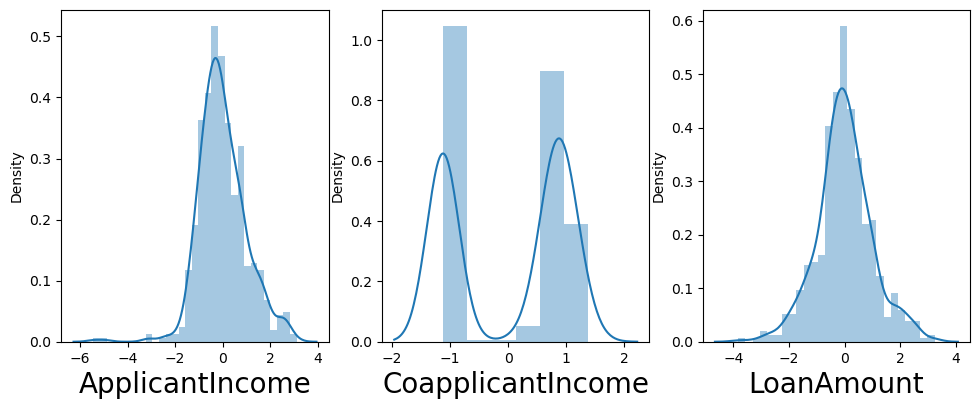

In [51]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for col in df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]:
    if plotnumber<=35:
        plt.subplot(5,5,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

### Use encoding method to encode categorical data

In [52]:
x[['Gender','Married','Education','Self_Employed','Property_Area']].nunique()

Gender           2
Married          2
Education        2
Self_Employed    2
Property_Area    3
dtype: int64

In [53]:
dummy = pd.get_dummies(x[['Gender','Married','Education','Self_Employed','Property_Area']],drop_first = False)

In [54]:
dummy

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,1,1,0,1,0,1,0,0
1,0,1,0,1,1,0,0,1,0,0,1
2,0,1,0,1,0,1,1,0,0,0,1
3,0,1,1,0,1,0,1,0,0,0,1
4,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
583,1,0,1,0,1,0,1,0,1,0,0
584,0,1,0,1,1,0,1,0,1,0,0
585,0,1,0,1,1,0,1,0,0,0,1
586,0,1,0,1,1,0,1,0,0,0,1


In [55]:
df = df.join(dummy)

In [56]:
df.drop(columns = ['Gender','Married','Education','Self_Employed','Property_Area'],axis = 1, inplace = True)

In [57]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0.241129,0.746374,-0.011579,360.0,1.0,N,0,1,0,1,1,0,1,0,1,0,0
1,0,-0.524218,-1.121479,-1.389840,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
2,0,-0.790224,0.897667,-0.162907,360.0,1.0,Y,0,1,0,1,0,1,1,0,0,0,1
3,0,0.737227,-1.121479,0.222832,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
4,2,0.548120,1.100514,2.025036,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,0,-0.584669,-1.121479,-1.255627,360.0,1.0,Y,1,0,1,0,1,0,1,0,1,0,0
584,3+,0.040879,-1.121479,-2.208548,180.0,1.0,Y,0,1,0,1,1,0,1,0,1,0,0
585,1,1.292177,0.176446,1.854300,360.0,1.0,Y,0,1,0,1,1,0,1,0,0,0,1
586,2,1.174503,-1.121479,0.962409,360.0,1.0,Y,0,1,0,1,1,0,1,0,0,0,1


In [58]:
df['Dependents'].value_counts()

0     349
2      98
1      96
3+     45
Name: Dependents, dtype: int64

In [59]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [60]:
df['Loan_Status'] = df.Loan_Status.map({'N':0,'Y':1}) 

In [62]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0.241129,0.746374,-0.011579,360.0,1.0,0,0,1,0,1,1,0,1,0,1,0,0
1,0,-0.524218,-1.121479,-1.389840,360.0,1.0,1,0,1,0,1,1,0,0,1,0,0,1
2,0,-0.790224,0.897667,-0.162907,360.0,1.0,1,0,1,0,1,0,1,1,0,0,0,1
3,0,0.737227,-1.121479,0.222832,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1
4,2,0.548120,1.100514,2.025036,360.0,1.0,1,0,1,0,1,1,0,0,1,0,0,1


In [63]:
correlation = df.corr()
correlation

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
Dependents,1.000000,0.106509,-0.000255,0.128820,-0.087998,-0.014097,0.022784,-0.185290,0.185290,-0.332874,0.332874,-0.067963,0.067963,-0.039023,0.055036,-0.009862,0.006292,0.003075
ApplicantIncome,0.106509,1.000000,-0.359127,0.437832,-0.041335,0.031486,-0.004097,-0.058004,0.058004,0.021002,-0.021002,0.168378,-0.168378,-0.152402,0.216409,0.022896,-0.014213,-0.007546
CoapplicantIncome,-0.000255,-0.359127,1.000000,0.197179,0.013163,0.001040,0.081626,-0.231958,0.231958,-0.332638,0.332638,-0.035976,0.035976,0.075138,-0.101491,0.065812,-0.016492,-0.046841
LoanAmount,0.128820,0.437832,0.197179,1.000000,0.094719,-0.012746,-0.040371,-0.158346,0.158346,-0.174350,0.174350,0.131472,-0.131472,-0.078117,0.105884,0.086658,-0.001241,-0.082816
Loan_Amount_Term,-0.087998,-0.041335,0.013163,0.094719,1.000000,-0.007963,-0.021742,0.084742,-0.084742,0.100282,-0.100282,0.079580,-0.079580,0.037420,-0.054019,0.029380,0.062901,-0.093450
Credit_History,-0.014097,0.031486,0.001040,-0.012746,-0.007963,1.000000,0.555688,-0.015739,0.015739,-0.013469,0.013469,0.078182,-0.078182,-0.024625,-0.012612,-0.018350,0.047465,-0.031194
Loan_Status,0.022784,-0.004097,0.081626,-0.040371,-0.021742,0.555688,1.000000,-0.021413,0.021413,-0.096864,0.096864,0.092294,-0.092294,0.004803,-0.016187,-0.100527,0.134427,-0.041223
Gender_Female,-0.185290,-0.058004,-0.231958,-0.158346,0.084742,-0.015739,-0.021413,1.000000,-1.000000,0.376518,-0.376518,0.050498,-0.050498,-0.017548,-0.001154,-0.077501,0.106951,-0.035204
Gender_Male,0.185290,0.058004,0.231958,0.158346,-0.084742,0.015739,0.021413,-1.000000,1.000000,-0.376518,0.376518,-0.050498,0.050498,0.017548,0.001154,0.077501,-0.106951,0.035204
Married_No,-0.332874,0.021002,-0.332638,-0.174350,0.100282,-0.013469,-0.096864,0.376518,-0.376518,1.000000,-1.000000,0.014614,-0.014614,-0.022297,0.005355,0.013199,-0.002930,-0.009785


### check correlation using heatmap

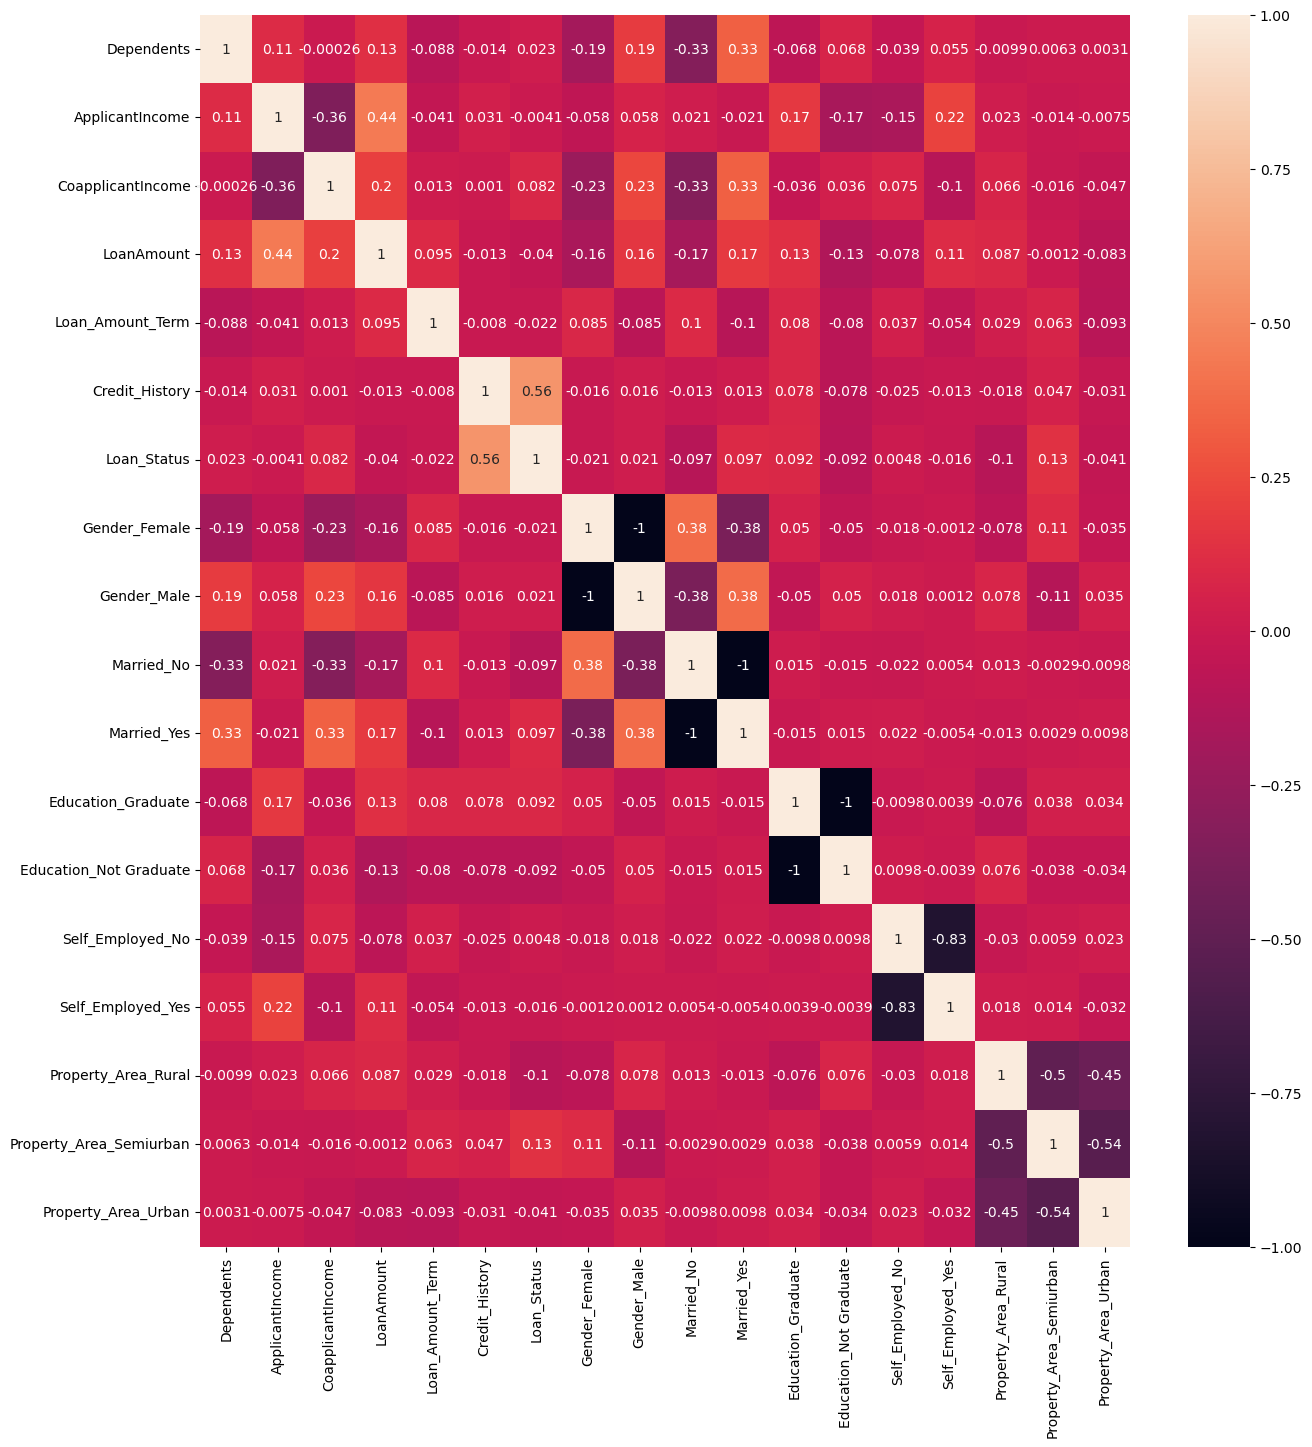

In [64]:
plt.figure(figsize=(15,16))
sns.heatmap(correlation,annot=True,)
plt.show()

## Visualizing correlation of feature columns with label column

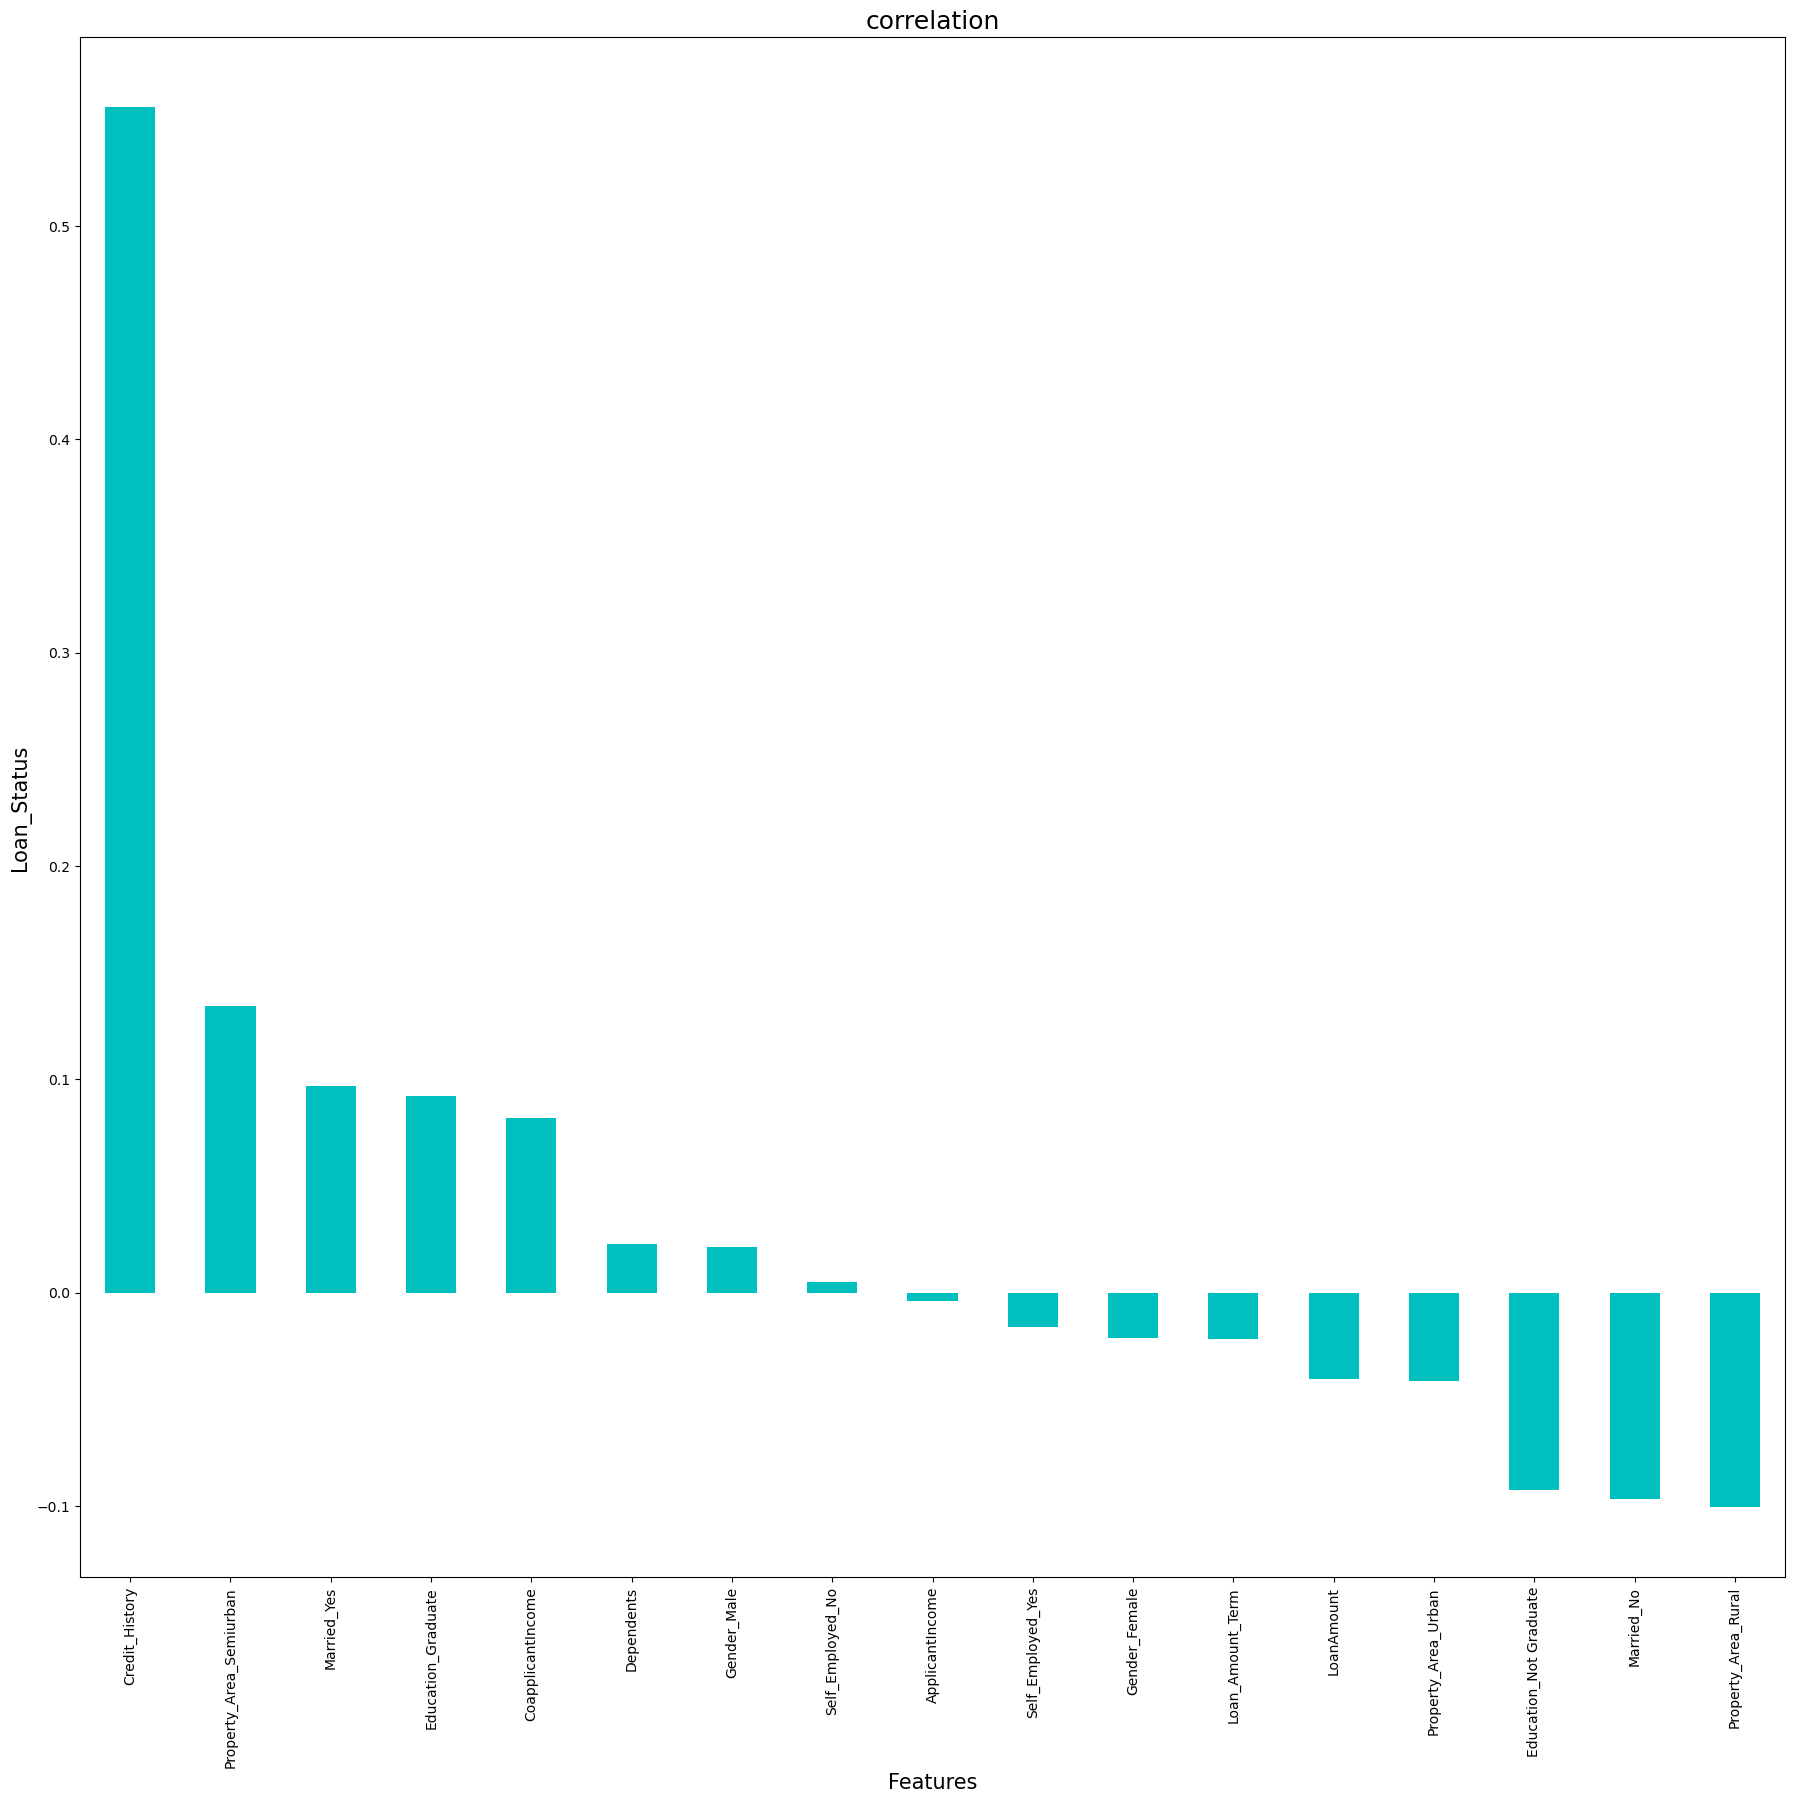

In [65]:
plt.figure(figsize = (22,20))
df.corr()['Loan_Status'].sort_values(ascending = False).drop(['Loan_Status']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Loan_Status',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

In [66]:
x = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler= StandardScaler()
scaled_x = scaler.fit_transform(x)

## Multicollinearity

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
vif = pd.DataFrame()

In [71]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]

In [72]:
vif

,Features,vif
0,Dependents,1.174310
1,ApplicantIncome,1.769458
2,CoapplicantIncome,1.590352
3,LoanAmount,1.573290
4,Loan_Amount_Term,1.058042
5,Credit_History,1.016440
6,Gender_Female,inf
7,Gender_Male,inf
8,Married_No,inf
9,Married_Yes,inf


## Selecting Kbest Features

In [73]:
from sklearn.feature_selection import SelectKBest, f_classif

In [74]:
bestfeat = SelectKBest(score_func = f_classif, k = 17)
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [75]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(17,'Score'))

                    Feature       Score
5            Credit_History  261.787460
15  Property_Area_Semiurban   10.784196
14      Property_Area_Rural    5.982416
8                Married_No    5.550332
9               Married_Yes    5.550332
10       Education_Graduate    5.034489
11   Education_Not Graduate    5.034489
2         CoapplicantIncome    3.930620
16      Property_Area_Urban    0.997528
3                LoanAmount    0.956645
0                Dependents    0.304367
4          Loan_Amount_Term    0.277141
7               Gender_Male    0.268807
6             Gender_Female    0.268807
13        Self_Employed_Yes    0.153592
12         Self_Employed_No    0.013517
1           ApplicantIncome    0.009838


In [76]:
x_best = x.drop(columns=['ApplicantIncome','Self_Employed_Yes','Self_Employed_No','Dependents']).copy()

In [77]:
x_best

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.746374,-0.011579,360.0,1.0,0,1,0,1,1,0,1,0,0
1,-1.121479,-1.389840,360.0,1.0,0,1,0,1,1,0,0,0,1
2,0.897667,-0.162907,360.0,1.0,0,1,0,1,0,1,0,0,1
3,-1.121479,0.222832,360.0,1.0,0,1,1,0,1,0,0,0,1
4,1.100514,2.025036,360.0,1.0,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-1.121479,-1.255627,360.0,1.0,1,0,1,0,1,0,1,0,0
584,-1.121479,-2.208548,180.0,1.0,0,1,0,1,1,0,1,0,0
585,0.176446,1.854300,360.0,1.0,0,1,0,1,1,0,0,0,1
586,-1.121479,0.962409,360.0,1.0,0,1,0,1,1,0,0,0,1


In [78]:
scaled_x_best = scaler.fit_transform(x_best)

## Model Building

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [80]:
from sklearn.linear_model import LogisticRegression
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, random_state = i,stratify = y)
    modRF =  LogisticRegression()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8579234972677595 on random_state: 56


In [81]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, stratify = y,random_state = 56)

In [83]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report


from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [84]:
RFC = RandomForestClassifier()
XGBC= XGBClassifier()
adbc = AdaBoostClassifier()
LOGR= LogisticRegression(solver='liblinear')
SV =  SVC()
KNN = KNeighborsClassifier()

In [85]:
RFC.fit(x_train,y_train)
XGBC.fit(x_train,y_train)
adbc.fit(x_train,y_train)
SV.fit(x_train,y_train)
LOGR.fit(x_train,y_train)
KNN.fit(x_train,y_train)

KNeighborsClassifier()

## Logistic Regression

In [87]:
y_pred = LOGR.predict(x_test)
accu = classification_report(y_test,y_pred)

conf_matrx = confusion_matrix(y_test,y_pred)
conf_matrx

array([[ 32,  25],
       [  1, 125]], dtype=int64)

In [88]:
print(accu)

              precision    recall  f1-score   support

           0       0.97      0.56      0.71        57
           1       0.83      0.99      0.91       126

    accuracy                           0.86       183
   macro avg       0.90      0.78      0.81       183
weighted avg       0.88      0.86      0.85       183



## Random Forest Classifier

In [89]:
y_pred = RFC.predict(x_test)
accu = classification_report(y_test,y_pred)

conf_matrx = confusion_matrix(y_test,y_pred)
conf_matrx

array([[ 36,  21],
       [ 14, 112]], dtype=int64)

In [90]:
print(accu)

              precision    recall  f1-score   support

           0       0.72      0.63      0.67        57
           1       0.84      0.89      0.86       126

    accuracy                           0.81       183
   macro avg       0.78      0.76      0.77       183
weighted avg       0.80      0.81      0.81       183



## XGB Classifier

In [93]:
y_pred = XGBC.predict(x_test)
accu = classification_report(y_test,y_pred)

In [94]:
conf_matrx = confusion_matrix(y_test,y_pred)
conf_matrx

array([[ 36,  21],
       [ 13, 113]], dtype=int64)

In [95]:
print(accu)

              precision    recall  f1-score   support

           0       0.73      0.63      0.68        57
           1       0.84      0.90      0.87       126

    accuracy                           0.81       183
   macro avg       0.79      0.76      0.77       183
weighted avg       0.81      0.81      0.81       183



## AdaBoost Classifier

In [96]:
y_pred = adbc.predict(x_test)
accu = classification_report(y_test,y_pred)

conf_matrx = confusion_matrix(y_test,y_pred)
conf_matrx

array([[ 35,  22],
       [  6, 120]], dtype=int64)

In [97]:
print(accu)

              precision    recall  f1-score   support

           0       0.85      0.61      0.71        57
           1       0.85      0.95      0.90       126

    accuracy                           0.85       183
   macro avg       0.85      0.78      0.80       183
weighted avg       0.85      0.85      0.84       183



## SV Classifier

In [98]:
y_pred = SV.predict(x_test)
accu = classification_report(y_test,y_pred)
conf_matrx = confusion_matrix(y_test,y_pred)
conf_matrx

array([[ 32,  25],
       [  1, 125]], dtype=int64)

In [99]:
print(accu)

              precision    recall  f1-score   support

           0       0.97      0.56      0.71        57
           1       0.83      0.99      0.91       126

    accuracy                           0.86       183
   macro avg       0.90      0.78      0.81       183
weighted avg       0.88      0.86      0.85       183



## KNN 

In [100]:
y_pred = KNN.predict(x_test)
accu = classification_report(y_test,y_pred)


conf_matrx = confusion_matrix(y_test,y_pred)
conf_matrx

array([[ 28,  29],
       [  8, 118]], dtype=int64)

In [101]:
print(accu)

              precision    recall  f1-score   support

           0       0.78      0.49      0.60        57
           1       0.80      0.94      0.86       126

    accuracy                           0.80       183
   macro avg       0.79      0.71      0.73       183
weighted avg       0.79      0.80      0.78       183



### Model Cross Validation

In [102]:
from sklearn.model_selection import cross_val_score as cvs

In [103]:
print(cvs(LOGR,scaled_x_best,y,cv=5).mean())
print(cvs(RFC,scaled_x_best,y,cv=5).mean())
print(cvs(XGBC,scaled_x_best,y,cv=5).mean())
print(cvs(adbc,scaled_x_best,y,cv=5).mean())
print(cvs(SV,scaled_x_best,y,cv=5).mean())
print(cvs(KNN,scaled_x_best,y,cv=5).mean())

0.8096334926843403
0.7670867738664349
0.7586121975952483
0.7909169926119077
0.8164421266116182
0.7858177603940316


## Hyper Parameter Tuning

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
parameter = {'C':[0.001,0.01],'penalty':['l1', 'l2'],'dual': [True,False],'fit_intercept':[True,False],'random_state':[1,2,3],'solver':['liblinear'],'max_iter':[100,200],'multi_class':['auto']}

In [106]:
GridCV = GridSearchCV(LogisticRegression(),parameter,cv=5,n_jobs = -1,verbose=2)

In [107]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01], 'dual': [True, False],
                         'fit_intercept': [True, False], 'max_iter': [100, 200],
                         'multi_class': ['auto'], 'penalty': ['l1', 'l2'],
                         'random_state': [1, 2, 3], 'solver': ['liblinear']},
             verbose=2)

In [108]:
GridCV.best_params_

{'C': 0.01,
 'dual': True,
 'fit_intercept': True,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'liblinear'}

In [109]:
Best_mod1 = LogisticRegression(C = 0.01,dual = True,fit_intercept = True,max_iter = 100,multi_class = 'auto', penalty = 'l2',random_state= 1,solver = 'liblinear')
Best_mod1.fit(x_train,y_train)
lrpred = Best_mod1.predict(x_test)
acc = accuracy_score(y_test,lrpred)
print(acc*100)

84.69945355191257


In [110]:
conf_matrx = confusion_matrix(y_test,lrpred)
conf_matrx

array([[ 32,  25],
       [  3, 123]], dtype=int64)

## Saving The Model

In [111]:
from pickle import dump
dump(Best_mod1,open('LoanApplication.pkl','wb'))

In [112]:
import pickle
loaded_model = pickle.load(open('LoanApplication.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

84.69945355191257


In [113]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,182
Predicted,1,1,1,0,1,0,1,1,1,0,...,1,0,0,1,1,0,1,1,1,1
Original,1,1,1,0,1,0,1,1,1,0,...,1,0,1,1,1,0,1,1,1,1


# END